# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [1]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

45304


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [2]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [3]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'chromosome_scaling')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\figures.


# Plotting parameters

In [4]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [5]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [6]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [7]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [8]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load contact single cell summary
(ratio over total number of contacts in singel cell )


Data can be generated by notebook as

[7_1_cis_contact_by_genomic_dsitance_from_singlecell_zxy](7_1_cis_contact_by_genomic_dsitance_from_singlecell_zxy.ipynb)

In [10]:
import pickle

contact_summary_folder = r'L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\analysis'
contact_summary_dict = pickle.load(open(os.path.join(contact_summary_folder,'cis_contact_singlecell_frequency_subclass.pkl'),'rb'))

## summarize to plot dataframe

In [11]:
import tqdm
gene_dist_bins = [(0,2000000), 
                  (2000000,5000000), 
                  (5000000, 10000000),
                  (10000000,20000000),
                  (20000000,50000000),
                  (50000000,200000000)]

res_dict = {k:{} for k in gene_dist_bins}

# min number of contacts recovered for quality control
contact_num_th = 1000

for _class, _summary_list in tqdm.tqdm(contact_summary_dict.items()):
    for _k, _v in res_dict.items():
        _v[_class] = []

for _class, _summary_list in tqdm.tqdm(contact_summary_dict.items()):
    for _bin_query in res_dict.keys():
        for _contact_summary in _summary_list:
            contact_query = 0
            contact_total = 0
            for _chr, _contact_bybin in _contact_summary.items():
                contact_query += _contact_bybin[_bin_query]
                contact_total += _contact_bybin['total']
                
            contact_query_ratio = contact_query/contact_total
            # set a th for clean cell
            if contact_total >= contact_num_th:
                res_dict[_bin_query][_class].append(contact_query_ratio)

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:02<00:00, 10.33it/s]


In [12]:
# summarize to dataframe
_contact_result_df_list = []
_contact_result_df_dict = {}
for _bin_query, _contact_result in res_dict.items():
    _contact_result_df = pd.DataFrame.from_dict(res_dict[_bin_query], orient='index').transpose()
    _contact_result_df_list.append(_contact_result_df)
    _contact_result_df_dict[_bin_query] = _contact_result_df
    

# Plot results

In [13]:
# order by class then by transcriptional acitvity
new_sorted_cellplot_order = ['Micro', 'Endo', 'Oligo',  'Astro', 'OPC',
                      'Vip', 'Lamp5', 'Sst', 'Pvalb', 
                       'L5/6 NP','L4/5 IT',  'L6 CT', 'L6 IT', 'L6b',   'L2/3 IT', 
                       'L5 IT', 'L5 ET']

In [14]:
sel_sorted_bin_keys = [(5e7,2e8),
                       (2e7,5e7),
                       (1e7, 2e7),
                       (5e6, 1e7),
                       (2e6,5e6), 
                       (0, 2e6)]

meta NOT subset; don't know how to subset; dropped


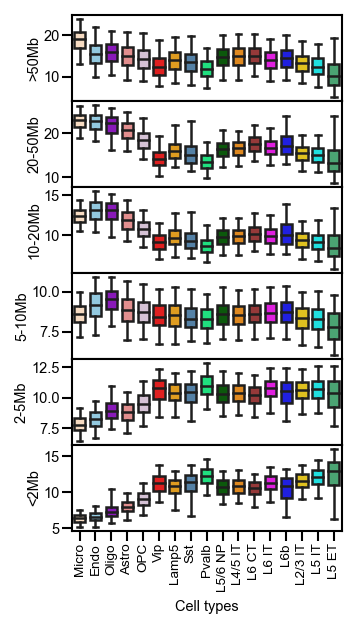

In [16]:
%matplotlib inline

fig, axes = plt.subplots(len(sel_sorted_bin_keys),1, 
                         figsize=(_page_width/2.75,_page_width/2.75*2), 
                         sharex=True, sharey=False, dpi=150)



ylabel_list = ['>50Mb','20-50Mb', '10-20Mb','5-10Mb','2-5Mb','<2Mb']
ylim_list = [[],[],[],[],[],[],]



for _idx,_bin_key in enumerate(sel_sorted_bin_keys):
    res_dict_df = _contact_result_df_dict[_bin_key]

    # multiple by 100 to get %
    res_dict_df = res_dict_df*100
    # plot using defined order
    res_dict_df = res_dict_df[new_sorted_cellplot_order]

    sns.boxplot(res_dict_df, showfliers=False, 
                whis=[5, 95],
                ax=axes[_idx],palette=celltype_palette,width=0.7)
    axes[_idx].tick_params(labelleft=False)

        
for _ax_idx, _ax in enumerate(axes):
    _ax.set_ylabel(ylabel_list[_ax_idx], rotation=90, fontsize=_font_size,labelpad=1)
    _ax.tick_params(axis='y', labelsize=_font_size,pad=1,labelleft=True)
    if _ax_idx!=len(axes)-1:
        _ax.tick_params(labelbottom=False)
        _ax.set_xlabel("", rotation=0, fontsize=_font_size-0.5)
        _ax.tick_params(axis='x', rotation=90, pad=1,labelsize=0,length=0) 
    else:
        _ax.set_xlabel("Cell types", rotation=0, fontsize=_font_size)
        _ax.tick_params(axis='x', rotation=90, pad=1,labelsize=_font_size-0.5) 
    if len(ylim_list[_ax_idx])==2:
        _ax.set_ylim(ylim_list[_ax_idx])
    _ax.grid(False)

fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.05, right=0.95, top=0.98, bottom=0.12)
plt.savefig(os.path.join(output_figure_folder, f'cis_chrom_pairwise_contact_frequency_singlecell.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

plt.show()